In [19]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import json

In [6]:
with open('algoparams_from_ui.json') as f:
    d = json.load(f)
    print(d)

{'session_name': 'test', 'session_description': 'test', 'design_state_data': {'session_info': {'project_id': '1', 'experiment_id': 'kkkk-11', 'dataset': 'iris_modified.csv', 'session_name': 'test', 'session_description': 'test'}, 'target': {'prediction_type': 'Regression', 'target': 'petal_width', 'type': 'regression', 'partitioning': True}, 'train': {'policy': 'Split the dataset', 'time_variable': 'sepal_length', 'sampling_method': 'No sampling(whole data)', 'split': 'Randomly', 'k_fold': False, 'train_ratio': 0, 'random_seed': 0}, 'metrics': {'optomize_model_hyperparameters_for': 'AUC', 'optimize_threshold_for': 'F1 Score', 'compute_lift_at': 0, 'cost_matrix_gain_for_true_prediction_true_result': 1, 'cost_matrix_gain_for_true_prediction_false_result': 0, 'cost_matrix_gain_for_false_prediction_true_result': 0, 'cost_matrix_gain_for_false_prediction_false_result': 0}, 'feature_handling': {'sepal_length': {'feature_name': 'sepal_length', 'is_selected': True, 'feature_variable_type': 'nu

In [7]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [23]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [24]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [25]:
data.nunique

<bound method DataFrame.nunique of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

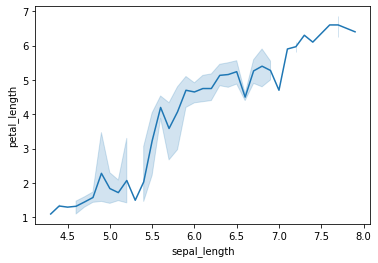

In [20]:
sns.lineplot(x=data["sepal_length"],y=data["petal_length"])

Text(0.5, 1.0, 'sepal length vs petal length')

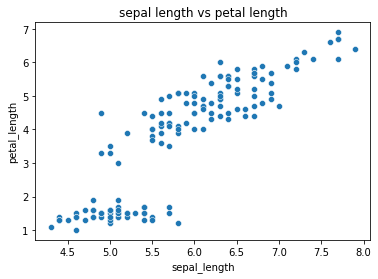

In [26]:
sns.scatterplot(x=data["sepal_length"],y=data["petal_length"])
plt.title("sepal length vs petal length")

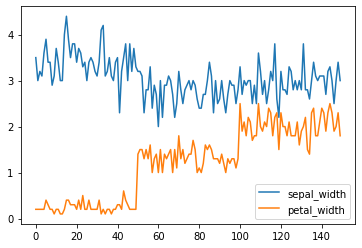

In [27]:
plt.plot(data['sepal_width'])
plt.plot(data['petal_width'])
plt.legend(["sepal_width", "petal_width"])

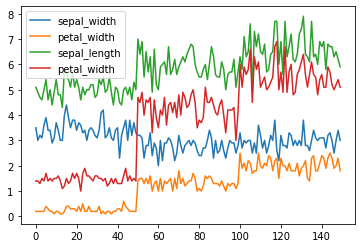

In [28]:
plt.plot(data['sepal_width'])
plt.plot(data['petal_width'])
plt.plot(data['sepal_length'])
plt.plot(data['petal_length'])
plt.legend(["sepal_width", "petal_width","sepal_length","petal_width"])
plt.rcParams["figure.figsize"]=(18,5)

i used plt.rcParams["figure.figsize"] where width= 18 height=15

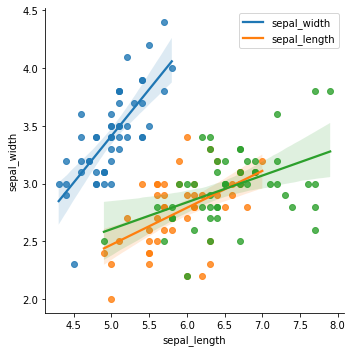

In [29]:
sns.lmplot( x="sepal_length", y="sepal_width", data=data, hue='species', legend=False)

plt.legend(["sepal_width","sepal_length"])

LETS START ANALYSING THE SPECIES

**A Multivariate Analysis**

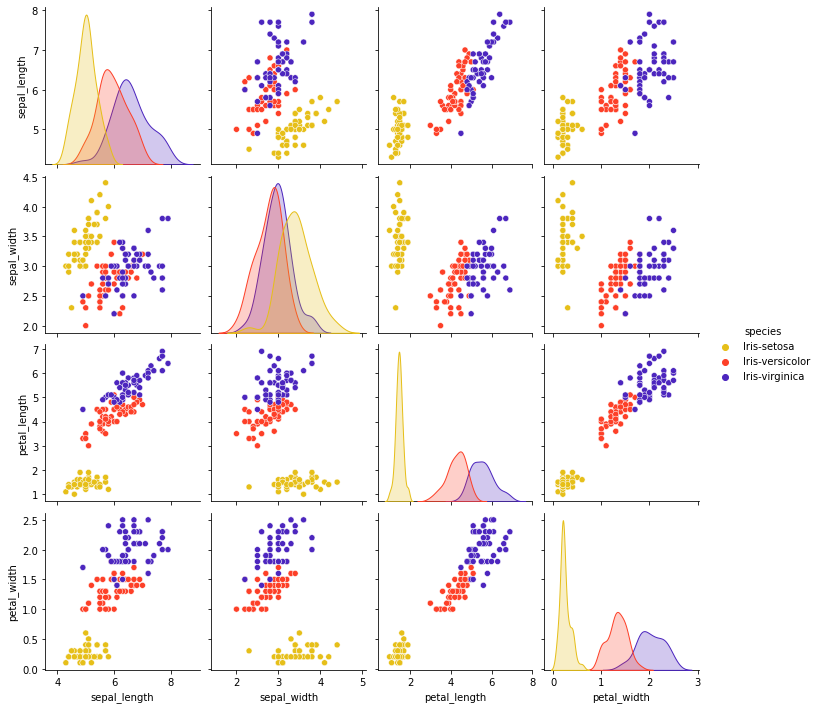

In [30]:
sns.pairplot(data, hue = "species",palette='CMRmap_r')

after graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (yellow) is distinctly different from those of the other two species.

There is some overlapping going in the pairwise relationships of the other two species,iris-versicolor (orange) and iris-virginica (blue).


Text(0.5, 1.0, 'petal_width')

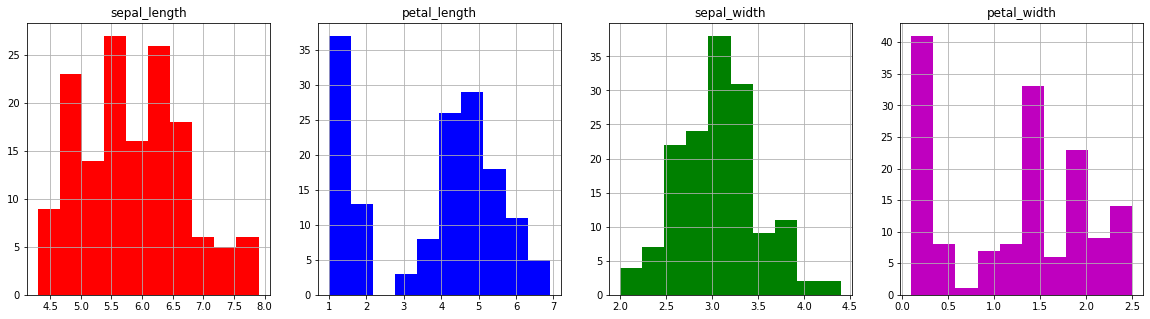

In [31]:
fig,axes=plt.subplots(1,4,figsize=(20,5))

data['sepal_length'].hist(ax=axes[0],color="r").set_title("sepal_length")
data['petal_length'].hist(ax=axes[1],color="b").set_title("petal_length")
data['sepal_width'].hist(ax=axes[2],color="g").set_title("sepal_width")
data['petal_width'].hist(ax=axes[3],color="m").set_title("petal_width")

Bar plot to understand about species

Text(0.5, 1.0, 'species vs petal_width')

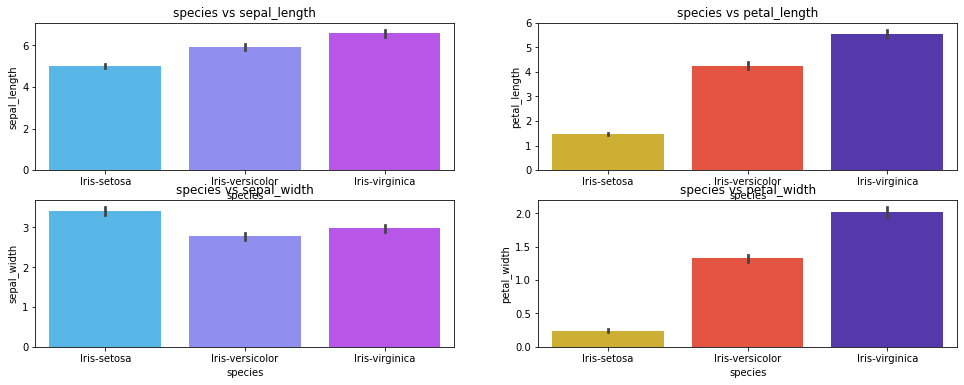

In [32]:
fig,axes=plt.subplots(2,2,figsize=(16,5))
plt.subplots_adjust(left=0.1,
                     bottom=0.1,
                    right=0.9, 
                    top=1
                    )
sns.barplot(x=data["species"],y=data["sepal_length"],palette='cool',ax=axes[0][0]).set_title('species vs sepal_length')
sns.barplot(x=data["species"],y=data["sepal_width"],palette='cool',ax=axes[1][0]).set_title('species vs sepal_width')
sns.barplot(x=data["species"],y=data["petal_length"],palette='CMRmap_r',ax=axes[0][1]).set_title('species vs petal_length')
sns.barplot(x=data["species"],y=data["petal_width"],palette='CMRmap_r',ax=axes[1][1]).set_title('species vs petal_width')

conclusion from bivariative analysis
sepal length plot 1
iris-setosa has the shorter sepal length and iris virginica has longer

petal length plot 2
iris-setosa has the shorter petal length and Iris virginica has longer

sepal width plot 3
iris-setosa has the longer sepal width then Iris virginica

petal width plot 4
iris-setosa has the shorter petal width and Iris virginica has longer

>



Text(0.5, 1.0, 'iris species classifications')

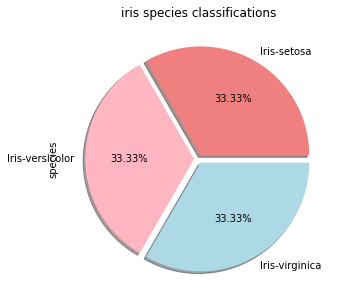

In [33]:
data['species'].value_counts().plot.pie(explode=[0.04,0.04,0.04],shadow=True,autopct='%1.2f%%',colors=["lightcoral","lightpink","lightblue"],).set_title("iris species classifications")

correlation is used to exclude the data which is not available or the data is non-numeric

In [34]:
correlation=data.corr()

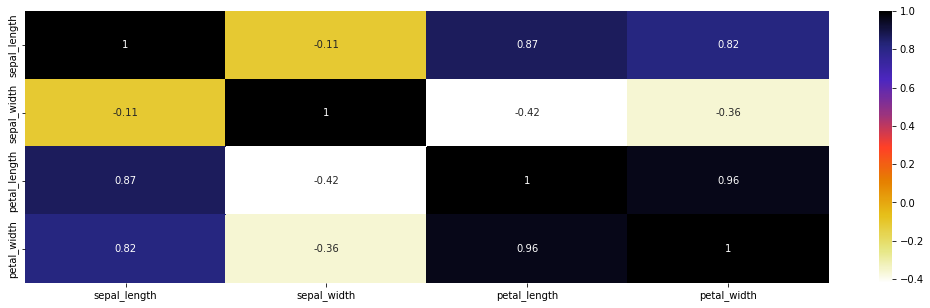

In [35]:
sns.heatmap(correlation,annot=True,cmap='CMRmap_r')
plt.rcParams["figure.figsize"]=(5,5)

In [38]:
##CLEANING THE DUPLICATED DATA

In [39]:
 data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [40]:
 data.duplicated().value_counts()

False    147
True       3
dtype: int64

In [41]:
data.drop_duplicates(inplace=True)
data.shape

(147, 5)

In [42]:
 data.duplicated().any()

False

**MODEL IMPLEMENTATION**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm
from sklearn.metrics import classification_report

iris-setosa
iris-versicolor
iris-virginica

Need to convert this non -numeric value into numeric value which are understand by machine and used for training the model

In [44]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()
data['species']= label_encoder.fit_transform(data['species'])
  
data['species'].unique()

array([0, 1, 2])

Now the value of this species has been converted into array

iris-setosa ==0
iris-versicolor ==1
iris-virginica ==2

In [45]:
data["species"].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [47]:
from sklearn.model_selection  import train_test_split
x = data.drop(['species'],axis=1)
# independent variable
# independent variable
y = data['species']

In [48]:
x_sepal_train,x_sepal_test,y_species_train,y_species_test = train_test_split(x,y,random_state=0,test_size=0.3)
x_sepal_train.shape, x_sepal_test.shape, y_species_train.shape, y_species_test.shape

((102, 4), (45, 4), (102,), (45,))

In [50]:
x_sepal_train

,sepal_length,sepal_width,petal_length,petal_width
140,6.7,3.1,5.6,2.4
116,6.5,3.0,5.5,1.8
99,5.7,2.8,4.1,1.3
96,5.7,2.9,4.2,1.3
62,6.0,2.2,4.0,1.0
...,...,...,...,...
9,4.9,3.1,1.5,0.1
105,7.6,3.0,6.6,2.1
69,5.6,2.5,3.9,1.1
119,6.0,2.2,5.0,1.5


In [51]:
x_sepal_test

,sepal_length,sepal_width,petal_length,petal_width
7,5.0,3.4,1.5,0.2
24,4.8,3.4,1.9,0.2
27,5.2,3.5,1.5,0.2
122,7.7,2.8,6.7,2.0
146,6.3,2.5,5.0,1.9
53,5.5,2.3,4.0,1.3
45,4.8,3.0,1.4,0.3
22,4.6,3.6,1.0,0.2
114,5.8,2.8,5.1,2.4
26,5.0,3.4,1.6,0.4


In [52]:
y_species_train

140    2
116    2
99     1
96     1
62     1
      ..
9      0
105    2
69     1
119    2
49     0
Name: species, Length: 102, dtype: int64

In [49]:
y_species_test

7      0
24     0
27     0
122    2
146    2
53     1
45     0
22     0
114    2
26     0
42     0
80     1
133    2
64     1
73     1
93     1
16     0
56     1
100    2
8      0
91     1
39     0
148    2
86     1
120    2
33     0
147    2
92     1
85     1
107    2
78     1
18     0
47     0
52     1
46     0
2      0
65     1
10     0
134    2
109    2
61     1
112    2
63     1
75     1
125    2
Name: species, dtype: int64

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#feed data into model
model.fit(x_sepal_train,y_species_train)
y_species_predicted=model.predict(x_sepal_test)

In [54]:
from sklearn.metrics import accuracy_score
sc_lr = round(model.score(x_sepal_test, y_species_test) * 100 , 2)

print("Accuracy: ", str(sc_lr) , " %" )

Accuracy:  92.44  %


In [55]:
print(model.intercept_)
print(model.coef_)

0.15161053466234176
[-0.10055422 -0.03511623  0.18486627  0.71262547]


In [56]:
 y_pred = model.intercept_  * x_sepal_test+ model.coef_
print(y_pred)

     sepal_length  sepal_width  petal_length  petal_width
7        0.657498     0.480360      0.412282     0.742948
24       0.627176     0.480360      0.472926     0.742948
27       0.687821     0.495521      0.412282     0.742948
122      1.066847     0.389393      1.200657     1.015847
146      0.854592     0.343910      0.942919     1.000685
53       0.733304     0.313588      0.791308     0.909719
45       0.627176     0.419715      0.397121     0.758109
22       0.596854     0.510682      0.336477     0.742948
114      0.778787     0.389393      0.958080     1.076491
26       0.657498     0.480360      0.427443     0.773270
42       0.566532     0.450037      0.381960     0.742948
80       0.733304     0.328749      0.760986     0.879397
133      0.854592     0.389393      0.958080     0.940041
64       0.748465     0.404554      0.730664     0.909719
73       0.824270     0.389393      0.897436     0.894558
93       0.657498     0.313588      0.685181     0.864236
16       0.718

In [57]:
y_pred = model.predict(x_sepal_test)
print(y_pred)

[-0.05073124  0.04332611 -0.0743537   1.94287257  1.70864814  1.1836732
  0.03620202 -0.10996593  2.12318973  0.11028048 -0.02034872  1.00066323
  1.43154971  1.07860153  1.1639264   0.89075628 -0.0029592   1.41130763
  2.2929967   0.00867278  1.28094162 -0.06078666  2.04609564  1.30684664
  2.03819082 -0.14758796  1.77921498  1.07170952  1.40098902  1.76311103
  1.34728458 -0.02692988 -0.02197293  1.32370905 -0.05634653 -0.05051498
  1.18012421 -0.10148779  1.47985439  2.21044966  1.2983685   1.87577114
  1.30293987  1.19369126  1.7071717 ]


In [60]:
data = pd.DataFrame({'Actual': y_species_test, 'Predicted': y_pred})
data

,Actual,Predicted
7,0,-0.050731
24,0,0.043326
27,0,-0.074354
122,2,1.942873
146,2,1.708648
53,1,1.183673
45,0,0.036202
22,0,-0.109966
114,2,2.123190
26,0,0.110280


**2 logistic regression**

In [61]:
from sklearn import linear_model
logistic_model=linear_model.LogisticRegression(max_iter=130)
logistic_model.fit(x_sepal_train,y_species_train)

LogisticRegression(max_iter=130)

In [62]:
y_species_logistic_predicted=logistic_model.predict(x_sepal_test)

#species iris senota
sc_logr = round(logistic_model.score(x_sepal_test, y_species_test) * 100,2)
print("Accuracy: ", str(sc_logr) ,  " %")

Accuracy:  100.0  %


In [63]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_species_test,y_species_test)
cm

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]])

Text(24.0, 0.5, 'species')

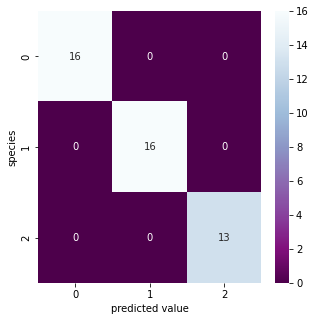

In [64]:
sns.heatmap(cm,annot=True,cmap='BuPu_r')
plt.rcParams["figure.figsize"]=(10,2)
plt.xlabel('predicted value')
plt.ylabel('species')

**3) KNN model**

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn_model.fit(x_sepal_train, y_species_train)

# Predicting the Test set results
y_knn_pred = knn_model.predict(x_sepal_test)

In [66]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_species_test, y_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [67]:
knn_cm=confusion_matrix(y_species_test, y_knn_pred)
knn_cm

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]])

In [68]:
accuracy = accuracy_score(y_species_test, y_knn_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 95.56 %.


Text(69.0, 0.5, 'species')

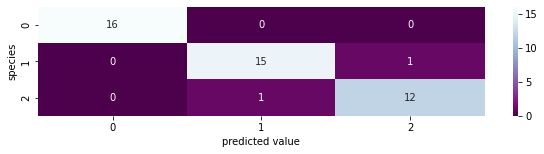

In [69]:
sns.heatmap(knn_cm,annot=True,cmap='BuPu_r')
plt.rcParams["figure.figsize"]=(10,2)
plt.xlabel('predicted value')
plt.ylabel('species')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


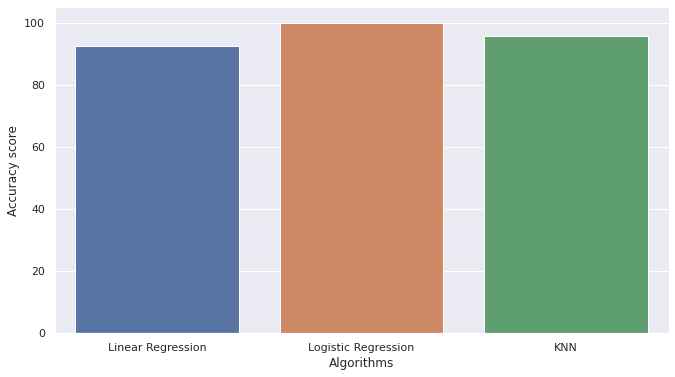

In [70]:
scores_plt = [sc_lr,sc_logr,accuracy]
algorithms = ["Linear Regression","Logistic Regression","KNN"]
sns.set(rc={'figure.figsize':(11,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores_plt)

** Evaluation**

In [71]:
##knn model

X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = knn_model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [72]:
##logistic model

X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = logistic_model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [73]:
X_new = np.array([[4.6,3.4, 1.4,0.3 ]])
#Prediction of the species from the input vector
prediction = logistic_model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


iris-setosa ==0
iris-versicolor ==1
iris-virginica ==2

thank you